Part 1

In [48]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [49]:
biases = [] 
for i in range(45,55): 
    biases.append(fits.getdata('nov_7Bias'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
avg_bias = np.asarray(biases).mean(axis=0)
lampoff = []
for i in range (55,58):
    lampoff.append(fits.getdata('nov_7'+'0'*(8-len(str(i)))+str(i) + '.fit', ext=0).astype(np.int))
nlamp = []
for i in range (58,61):
    nlamp.append(fits.getdata('nov_7'+'0'*(8-len(str(i)))+str(i) + '.fit', ext=0).astype(np.int))
hlamp = []
for i in range (61,63):
    hlamp.append(fits.getdata('nov_7'+'0'*(8-len(str(i)))+str(i) + '.fit', ext=0).astype(np.int))
sunon = []
for i in range (63,66):
    sunon.append(fits.getdata('nov_7'+'0'*(8-len(str(i)))+str(i) + '.fit', ext=0).astype(np.int))
sunoff = []
for i in range (66,69):
    sunoff.append(fits.getdata('nov_7Dark'+'0'*(8-len(str(i)))+str(i) + '.fit', ext=0).astype(np.int))
#here, we import all of our data frames. first, our 10 bias frames. we didn't rename our file name, so our bias frames
#start with a 45 at the end of the filename. everything else is in chronological order. we average the bias frames
#immediately after importing them, then we import our dark lamp off frames (lampoff), the neon lamp frames (nlamp),
#then hydrogen lamp frames (hlamp), then solar spectra (sunon) and our dark frames (sunoff). it's important to note
#that we took dark frames, not frames with just a cover over the end of the telescope. this means the shutter didn't
#even open in our dark frames. it's not a perfect bias here, but the solar spectra is so intense that it shouldn't
#matter in the end. the difference is minimal, and we'll see if our data stays intact.

In [50]:
nlamp_on_sub_bias = [lamp - avg_bias for lamp in nlamp] 
hlamp_on_sub_bias = [lamp - avg_bias for lamp in hlamp]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lampoff]
sun_on_sub_bias = [sun - avg_bias for sun in sunon]
sun_off_sub_bias = [sun - avg_bias for sun in sunoff]
#here, we take all of our data frames and correct them for the average bias at every point in the frame. we even take
#the bias from the lampoff and sunoff frames to limit the bias of the telescope itself. after this step, we should 
#have our data frames and be able to correct them for the lampoff and sunoff frames to get the most accurate data 
#possible.

In [51]:
avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)
nlamp_corrected = [nlamp - avg_lamp_off for nlamp in nlamp]
hlamp_corrected = [hlamp - avg_lamp_off for hlamp in hlamp]
sun_corrected = [sunon - avg_sun_off for sunon in sun_on_sub_bias]
#here, we take our corrected "dark" frames and take their means. in the same step, we also turn them into arrays. now,
#we can correct our data frames for the lampoff and sunoff frames. now we should have the data as corrected as we can
#get it, and can take the final steps toward extracting and analyzing the data.

In [52]:
avg_nlamp = np.asarray(nlamp_corrected).mean(axis=0)
avg_hlamp = np.asarray(hlamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)
#noe, we take the averages for our data frames and make them all into arrays. once they are arrays, they will have 
#dimensions of 1020 pixels by 1530 pixels, or the approximate dimensions of the ccd itself. these should be ready to 
#plot now, but first we'll run a little sanity check.

In [53]:
np.asarray(avg_sun).shape
#all we're doing here is checking the dimensions of the data array we created. as long as it checks out to be the 
#dimensions of the ccd, we should be able to move on without any problems.

(1020, 1530)

Text(0.5, 1.0, 'Solar Frame')

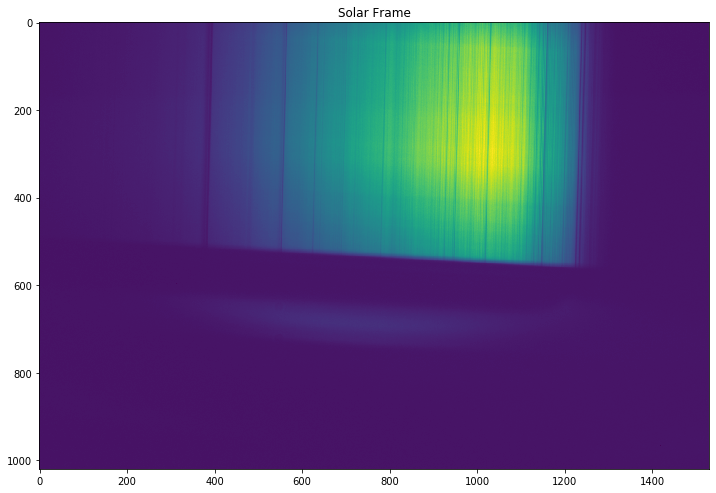

In [54]:
plt.imshow(avg_sun)
plt.title('Solar Frame')
#now we plot the average of our solar frames. as expected, it has the right dimensions of 1020 by 1530. the dark half
#of the bottom is the area under the sun (some of it being the dome occulting the field of view of the telescoope)
#looks dark because the sun is relatively bright compared to its surroundings. within the bright patch, we can see
#the telltale absorption lines of the solar spectra. we only care about this, so we adjust the dimensions of the plot
#to focus on this. 

Text(0.5, 1.0, 'Compressed Solar Frame')

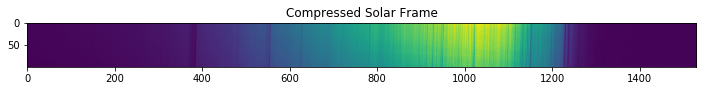

In [55]:
plt.imshow(avg_sun[400:500,:])
plt.title('Compressed Solar Frame')
#all we did below is graph a horizonal stripe at a height between 400 and 500 pixels. below, we see a condensed 
#version of the solar spectra, and it turns out to be exactly what we'd expect. 

Text(0.5, 1.0, 'Neon Frame')

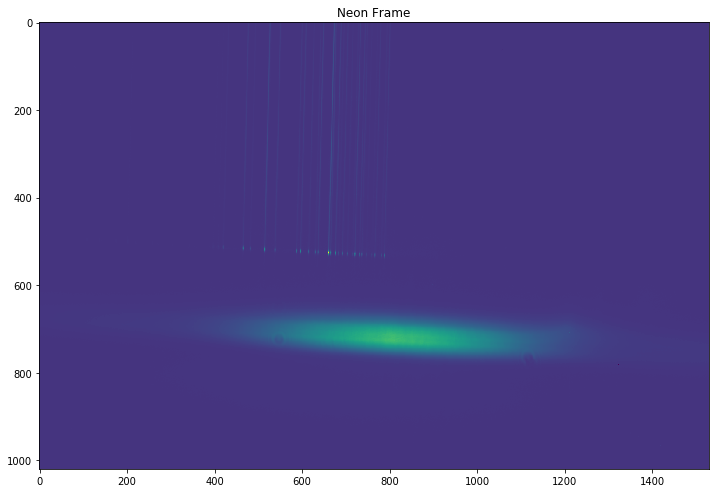

In [56]:
plt.imshow(avg_nlamp)
plt.title('Neon Frame')
#this is our averaged and corrected exposure for neon. we employ the same method above to trim this picture to only
#show the part we care about. compared to the sun, it's quite simple, but helium is simpler yet. this is the average
#of the actual light that hits the CCD, and it represents where on the CCD the flux comes from. darker greens 
#correlate to more flux (in units of counts of electrons, but it's not super important here).

Text(0.5, 1.0, 'Compressed Neon Frame')

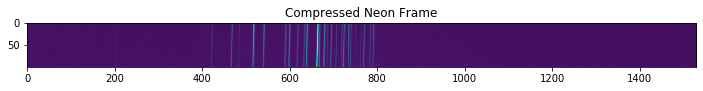

In [57]:
plt.imshow(avg_nlamp[400:500,:])
plt.title('Compressed Neon Frame')
#same picture as before, but cut down. the spectra appear in roughly the same area because we held the lamps in about
#the same position on the opening of the telescope, so we use the same vertical strip dimensions as all the other data

Text(0.5, 1.0, 'Helium Frame')

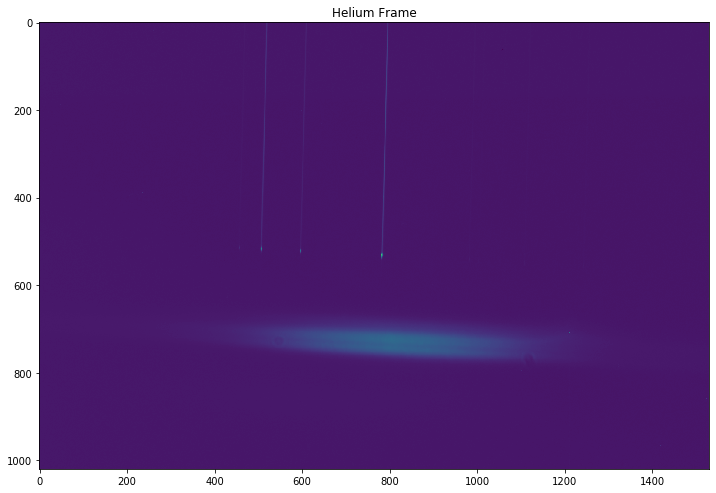

In [58]:
plt.imshow(avg_hlamp)
plt.title('Helium Frame')
#our last data frame of this sort. helium is by far the simplest, with only three lines really worth considering. 
#when we want to stretch and shift the spectra to fit known emission lines, we will work on helium first, since it has
#the simplest spectra of our three types-- neon, helium, and solar.

Text(0.5, 1.0, 'Compressed Helium Frame')

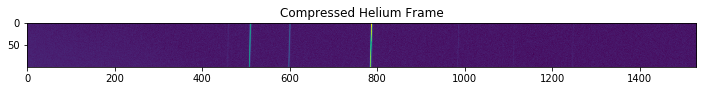

In [59]:
plt.imshow(avg_hlamp[400:500,:])
plt.title('Compressed Helium Frame')
#the position on the strip does not correlate with wavelength-- it correlates with pixel position on the CCD. the two
#are not intrinsically related, so we need to stretch and shift our graph over to match the known lines. 

In [60]:
nlamp_good = np.asarray(avg_nlamp[400:500,:]).mean(axis=0)
hlamp_good = np.asarray(avg_hlamp[400:500,:]).mean(axis=0)
sun_good = np.asarray(avg_sun[400:500,:]).mean(axis=0)
#this is taking the compressed frames from above, and converting them to a line graph with a y-axis of flux, which is
#just the number of counts at the position. the lines are also backwards (just as an artifact of the CCD) so we 
#introduce a "flip" parameter to put it how we're used to seeing it. 
lines = [585.25, 614.3, 640.2, 703.2]
plt.plot(np.flip(np.arange(len(nlamp_good)),0), nlamp_good, 'k-')
for line in lines:
    plt.axvline(line,color='r')
plt.xlabel('Uncalibrated Pixel Position')
plt.ylabel('Flux Density')
plt.title('Neon Flux Density vs. Pixel Position')
plt.yscale('log')
plt.show
#this is our first plot of flux vs. pixel position. it has not yet been calibrated for wavelength, so the unit of the
#x-axis is in pixel position for now. we use the strongest four lines from the source given to us, but in the unit of
#nanometers. it doesn't matter whether we use this or angstrom, so for our purposes, we used nanometers. the lines 
#are neither in the right x-position or spaced correctly, so we need to multiply the function by some value, but also
#add some value to it as well. we obtained the factors by trial and error, and are given in the next cell block. 
#we used features at wavelengths (585.25nm, 614.3nm, 640.2nm, and 703.2nm).
#corresponds to maxes at (approximately) pixels (750, 800, 875, and 1000).

<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

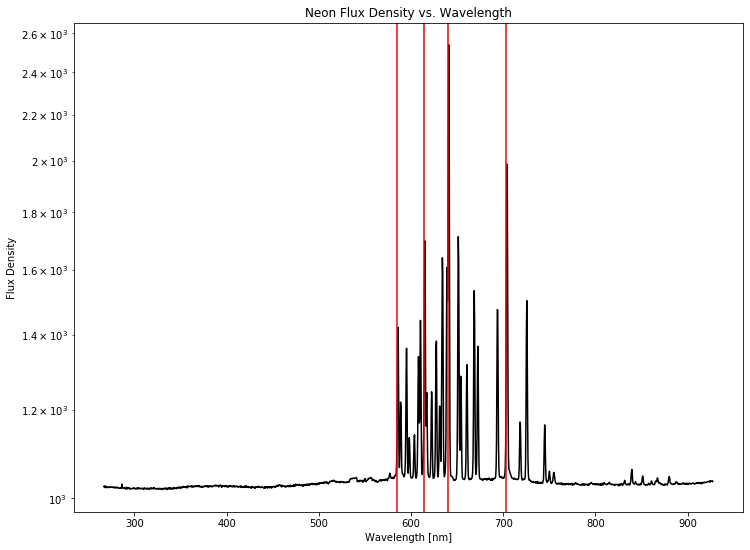

In [61]:
stretch = 0.4318
shift = 267
lines = [585.25, 614.3, 640.2, 703.2]
plt.plot(np.flip(np.arange(len(nlamp_good)),0)*stretch+shift, nlamp_good, 'k-')
for line in lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux Density')
plt.title('Neon Flux Density vs. Wavelength')
plt.yscale('log')
plt.show
#now, instead of plotting like we did before (as an array, showing the data as an image), now we plot it using the
#intensity of each line from the compressed spectra we plotted above. the strength of each line on the graph below is
#determined by counts at that position on the CCD, so the flux value is in counts. we stretch and shift the actual 
#plotted function by testing combinations of multiplying by a factor and adding by another factor. with the right 
#combination, our lines should line up with our data. we used the source provided to pick the four strongest 
#emission lines and lined them up. we came to our values purely by trial and error. the exact fluxes may not 
#correlate with the same intensity from the source, but we're more worried about position than relative strength. 

<function matplotlib.pyplot.show(*args, **kw)>

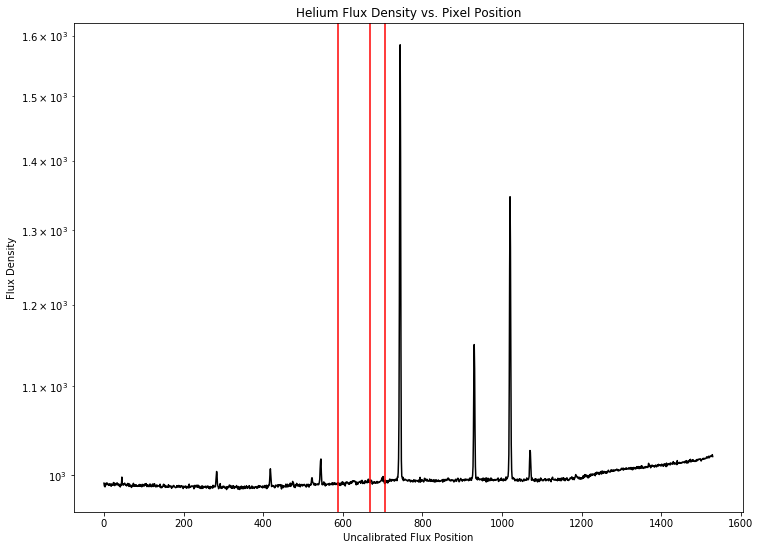

In [62]:
lines = [587.6,706.5,667.8]

plt.plot(np.flip(np.arange(len(hlamp_good)),0), hlamp_good, 'k-')
for line in lines:
    plt.axvline(line,color='r')
plt.xlabel('Uncalibrated Flux Position')
plt.ylabel('Flux Density')
plt.title('Helium Flux Density vs. Pixel Position')
plt.yscale('log')
plt.show
#we only used three lines in the calibration for helium, since these are the three strongest lines our data gave us.
#the wavelengths are taken exactly from the source, and are in units of nm for all cases in this lab. 
#we used features at wavelengths (587.6nm, 667.8nm, and 706.5nm).
#corresponds maxes at (approximately) (750, 925, and 1050).

<function matplotlib.pyplot.show(*args, **kw)>

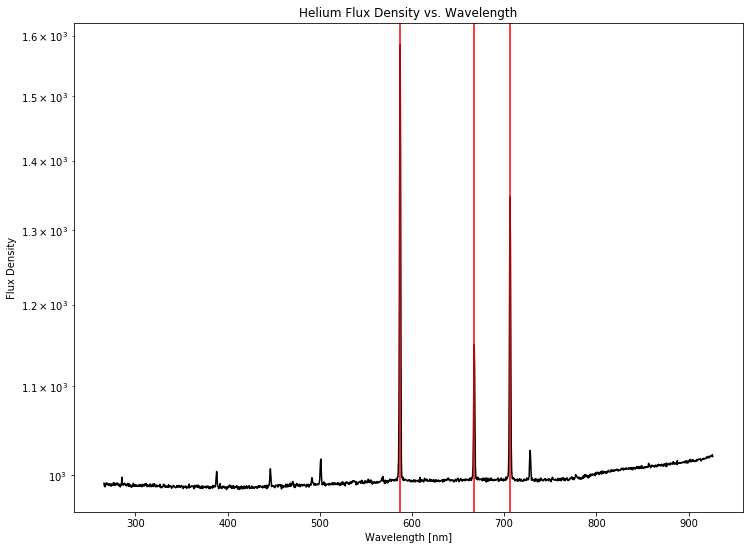

In [63]:
lines = [587.6,706.5,667.8]
stretch = 0.4318
shift = 266
plt.plot(np.flip(np.arange(len(hlamp_good)),0)*stretch+shift, hlamp_good, 'k-')
for line in lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux Density')
plt.title('Helium Flux Density vs. Wavelength')
plt.yscale('log')
plt.show
#once we determine the stretch and shift, it should be very similar (if not the exact same) for all of our data. here,
#we see it's only a tiny bit different. the same idea applies, however. once we see that our emission features line up
#with known emission lines, we can confidently re-label the x-axis to be nm. this is a way of checking that our data 
#makes sense, and as we can see, it does add up here. the "flip" in the plot function is just to make sure that lower
#wavelengths correspond to lower pixels, which it isn't by default.

<function matplotlib.pyplot.show(*args, **kw)>

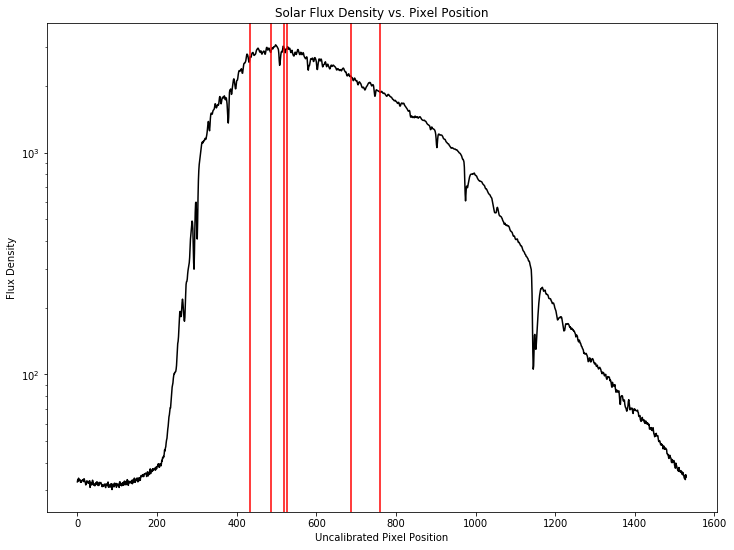

In [64]:
lines = [434.05, 486.134, 759.37, 686.72, 518.362, 527.039]
plt.plot(np.flip(np.arange(len(sun_good)),0), sun_good, 'k-')
for line in lines:
    plt.axvline(line,color='r')
plt.xlabel('Uncalibrated Pixel Position')
plt.ylabel('Flux Density')
plt.title('Solar Flux Density vs. Pixel Position')
plt.yscale('log')
plt.show
#this again shows the lines we used on the corrected spectra, but without the stretch and shift. we can see that the
#ranges match up to the width of the CCD, but this metric isn't very useful. stretch and shift were calibrated by
#trial and error, followed by analysis to check if it's right. the names and designations of the absorption lines
#are given in the same block as the calibrated solar absorption spectra graph. 
#we used features at wavelengths (434.05nm, 486.134nm, 518.632nm, 527.039nm, 686.72nm, and 759.37nm).
#corresponding to dips at (approximately) (425, 500, 510, 520, 690, 760).

In [65]:
lines = [434.05, 486.134, 759.37, 686.72, 518.362, 527.039]
stretch = 0.431
shift = 267
plt.plot(np.flip(np.arange(len(sun_good)),0)*stretch+shift, sun_good, 'k-')
for line in lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux Density')
plt.title('Solar Flux Density vs. Wavelength')
plt.yscale('log')
plt.show
#we expect our linear transformations to work for all of our data, and now we can see that they do. solar flux is a 
#bit more complicated than our emission lines earlier, but with a little tweaking, we can get the lines to add up.
#we used a 6 of the more prominent emission features in the solar spectra. as far as shape goes, it looks dead-on to
#what we expect the solar spectra to look like. the designations of each line are given below, in the same order as 
#the wavelengths in the "lines" function are.
#designations = [G', F, A, B, b1, E2]
#elements = [Hgamma, Hbeta, O2, O2, Mg, Fe]
#the log y-axis makes the features harder to discern, but it's what the lab report asked for, so here we are. 

<function matplotlib.pyplot.show(*args, **kw)>

In [66]:
#closing comments-- after we imported all our data, we correct it for the general bias frame of the telescope via 
#multiple zero-second exposures. next, we correct for the background noise of our two setups-- one for the element 
#lamps we held in front of the telescope, one for the solar spectra. once we correct them (to the best of our ability)
#we can make them into arrays and plot them. we only really care about the portion of the frames with the spectra, but
#we show the whole frame for completeness. we extract the useful part of the frame to check that we have emission
#lines. we can plot these as a 2d plot, with the y-axis being the flux density of where the light hit on the little
#horizontal strip, to see which are brightest. we only know their position based on the dimensions of the CCD, so 
#after some trial and error, we find a linear transformation to convert pixels to nanometers. once we have these 
#"stretch and shift" factors, we add vertical lines where we expect features of the spectra to occur. all wavelengths
#are exactly the same as the most intense wavelengths, via the given source. 